<h1>Diabetes Prediction by <strong style="color:#BD2640">Rhimini Aimane</strong></h1>


<h2 style="color:#BD2640">1. Chargement et Exploration des Données :</h2>

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("diabetes.csv",sep=",")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.shape

(768, 9)

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<h2 style="color:#BD2640">2. Visualisation des Données :</h2>

In [12]:
import matplotlib.pyplot as plt

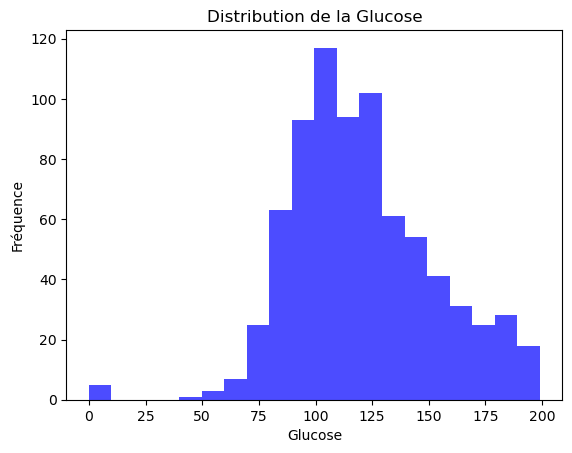

In [8]:
plt.hist(df['Glucose'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Glucose')
plt.ylabel('Fréquence')
plt.title('Distribution de la Glucose')
plt.show()

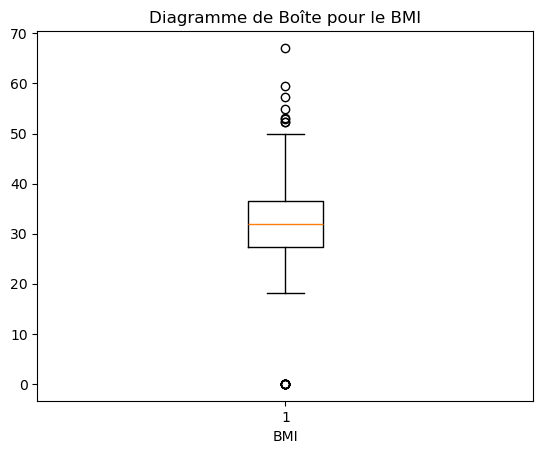

In [9]:
plt.boxplot(df['BMI'])
plt.xlabel('BMI')
plt.title('Diagramme de Boîte pour le BMI')
plt.show()

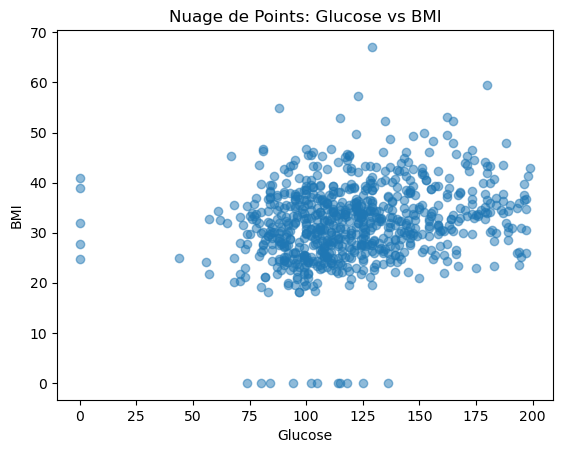

In [11]:
plt.scatter(df['Glucose'], df['BMI'], alpha=0.5)
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Nuage de Points: Glucose vs BMI')
plt.show()

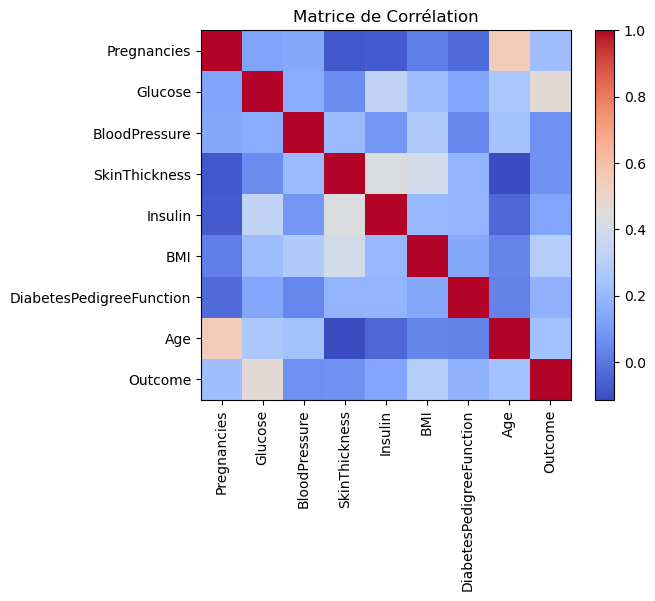

In [10]:
correlation_matrix = df.corr()
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Matrice de Corrélation')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

<h2 style="color:#BD2640">3. Prétraitement des Données :</h2>

In [15]:
import numpy as np

In [16]:
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']
for column in zero_not_accepted:
    df[column] = df[column].replace(0, np.NaN)
    mean = int(df[column].mean(skipna=True))
    df[column] = df[column].replace(np.NaN, mean)

<h2 style="color:#BD2640">4. Division des Données en Ensembles d'Entraînement et de Test et  la Normalisation :</h2>

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [19]:
X = df.iloc[:, 0:8]
y = df.iloc[:, 8]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [20]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

<h2 style="color:#BD2640">5. Construction et Évaluation du Modèle KNN :</h2>

In [21]:
classifier = KNeighborsClassifier(n_neighbors=11, p=2,metric='euclidean')

In [22]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [23]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [28]:
cm = confusion_matrix(y_test, y_pred)
print (cm)

[[94 13]
 [15 32]]


<ul>
    <li>La classe "0" (non diabétique) : Le modèle a correctement prédit 94 cas comme non diabétiques <strong>(vrais négatifs)</strong>, mais a incorrectement classé 13 cas comme diabétiques <strong>(faux positifs)</strong>.<br></li>
    <li>La classe "1" (diabétique) : Le modèle a correctement prédit 32 cas comme diabétiques <strong>(vrais positifs)</strong>, mais a incorrectement classé 15 cas comme non diabétiques <strong>(faux négatifs)</strong>.</li>
</ul>.

In [29]:
print(f1_score(y_test, y_pred))

0.6956521739130436


ce qui indique que le modèle a <strong>une performance globalement solide dans la prédiction du diabète</strong>.

In [27]:
print(accuracy_score(y_test, y_pred))

0.8181818181818182


Un score de précision de <strong>0.818</strong> indique que le modèle a une précision globalement <strong>élevée</strong> dans la prédiction du diabète, ce qui suggère <strong>une bonne performance globale du modèle</strong>.